##### Prompt:
###### You are a python programmer with libraries faker, duckdb, parquet and pandas as tools and you are helping me to simulate a comprehensive data warehouse for general insurance organization with sample data having tables like premium register, claim register, customer acquisition table with cost, marketing table with per customer cost and budget, customer demographics table, product table, policy table, customer complaint table, policy / product cancellation table and all such required table, claim fraud table. Further write the code to estimate for each customer customer acquisition cost, customer churn, customer claims, new product marketing cost to customer and finally customer lifetime value 

In [1]:
import pandas as pd
import random
from faker import Faker
import datetime
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

fake = Faker("en_IN")
YEARS=5
# Cities:

In [2]:

all_cities = {
        "Delhi": "Delhi",
        "Mumbai": "Maharashtra",
        "Bangalore": "Karnataka",
        "Chennai": "Tamil Nadu",
        "Kolkata": "West Bengal",
        "Hyderabad": "Telangana",
        "Pune": "Maharashtra",
        "Ahmedabad": "Gujarat",
        "Surat": "Gujarat",
        "Vadodara": "Gujarat",
        "Indore": "Madhya Pradesh",
        "Jaipur": "Rajasthan",
        "Lucknow": "Uttar Pradesh",
        "Kanpur": "Uttar Pradesh",
        "Coimbatore": "Tamil Nadu",
        "Kochi": "Kerala",
        "Chandigarh": "Chandigarh",
        "Bhubaneswar": "Odisha",
        "Patna": "Bihar",
        "Visakhapatnam": "Andhra Pradesh",
        "Nagpur": "Maharashtra",
        "Nashik": "Maharashtra",
        "Aurangabad": "Maharashtra",
        "Ghaziabad": "Uttar Pradesh",
        "Faridabad": "Haryana",
        "Gurugram": "Haryana"
}

# Generate customer demographics table
def generate_customers(num_customers):
    customers = []
    for _ in range(num_customers):
        City=random.choice(list(all_cities.keys()))
        customer = {
            "Customer_id": fake.uuid4(),
            "First_name": fake.first_name(),
            "Last_name": fake.last_name(),
            "Gender": random.choice(["Male", "Female"]),
            "DOB": fake.date_between(date(1950, 1, 1),date(2006, 1, 1)),
            "City": City,
            "State": all_cities[City]
        }
        customers.append(customer)
    return pd.DataFrame(customers)

# Create 1000 customers
customer_df = generate_customers(1000)
customer_df.head(5)

,Customer_id,First_name,Last_name,Gender,DOB,City,State
0,32627d91-bf10-435b-bdb3-d8cde6fcd555,Jatin,Bora,Male,1982-04-02,Nashik,Maharashtra
1,24bcd61d-8e66-4323-af35-2699dd3a60ce,Charles,Nagarajan,Female,1993-10-11,Faridabad,Haryana
2,bf50ac27-05b2-49e1-a0fd-27869941ae9f,Netra,Nayar,Male,1963-11-18,Hyderabad,Telangana
3,99ee452d-edb3-459d-8496-1ab331ca3e7e,Ekavir,Toor,Female,1986-12-20,Vadodara,Gujarat
4,9b491f5a-3144-4978-af5f-4bfa4d5cc5a4,Frado,Balay,Female,1999-10-27,Bhubaneswar,Odisha


In [3]:
# Define  product master table with 20 automobile products and it's pricing based on the Indian automobile make model city 
# 5 health products based on customers age and City
data = {
    'Product ID' : ['AUTO_'+str(i) for i in range(1,51)],
    'Make': ['Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Kia', 'Toyota', 'Maruti Suzuki', 'Honda', 'Renault', 'Nissan', 
            'MG', 'Volkswagen', 'Skoda', 'BMW', 'Mercedes-Benz', 'Audi', 'Volvo', 'Jaguar', 'Land Rover', 'Porsche', 
            'Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Kia', 'Toyota', 'Maruti Suzuki', 'Honda', 'Renault', 'Nissan', 
            'MG', 'Volkswagen', 'Skoda', 'BMW', 'Mercedes-Benz', 'Audi', 'Volvo', 'Jaguar', 'Land Rover', 'Porsche', 
            'Maruti Suzuki', 'Hyundai', 'Tata', 'Mahindra', 'Kia', 'Toyota', 'Maruti Suzuki', 'Honda', 'Renault', 'Nissan'],
    'Model': ['Swift', 'Creta', 'Nexon', 'Thar', 'Seltos', 'Innova Crysta', 'Dzire', 'City', 'Kiger', 'Magnite', 
            'Hector', 'Polo', 'Octavia', '3 Series', 'C-Class', 'A4', 'XC40', 'F-Pace', 'Discovery', 'Cayenne', 
            'Baleno', 'Verna', 'Punch', 'Scorpio', 'Sonet', 'Fortuner', 'Alto', 'Amaze', 'Triber', 'Kicks', 
            'Gloster', 'Vento', 'Superb', '5 Series', 'E-Class', 'Q5', 'XC60', 'F-Type', 'Defender', '911', 
            'WagonR', 'i20', 'Altroz', 'XUV700', 'Carens', 'Camry', 'Ertiga', 'Jazz', 'Kwid', 'Magnite'],
    'Price (INR)': [600000, 1200000, 800000, 1500000, 1100000, 2000000, 550000, 1400000, 650000, 700000, 
                    1800000, 850000, 2500000, 4500000, 5000000, 4000000, 4200000, 6000000, 8000000, 12000000, 
                    500000, 1000000, 700000, 1800000, 900000, 2800000, 300000, 1150000, 500000, 800000, 
                    3000000, 1000000, 3000000, 5500000, 6000000, 4500000, 4800000, 7000000, 10000000, 
                    400000, 700000, 650000, 2200000, 1000000, 3500000, 600000, 1200000, 400000, 800000,750000]
}
# Create a DataFrame
make_model_master = pd.DataFrame(data)
# Logic behind pricing a policy for make model is models age and price
make_model_master.head(5)

,Product ID,Make,Model,Price (INR)
0,AUTO_1,Maruti Suzuki,Swift,600000
1,AUTO_2,Hyundai,Creta,1200000
2,AUTO_3,Tata,Nexon,800000
3,AUTO_4,Mahindra,Thar,1500000
4,AUTO_5,Kia,Seltos,1100000


In [4]:
data = {
    'Product ID': ['HEALTH_001', 'HEALTH_002', 'HEALTH_003', 'HEALTH_004', 'HEALTH_005'],
    'Product Name': ['Individual Health', 'Family Floater', 'Senior Citizen', 'Critical Illness', 'Top-up'],
    'Description': [
        'Covers medical expenses for a single individual.',
        'Covers medical expenses for the entire family under a single policy.',
        'Specifically designed for individuals aged 60 and above.',
        'Pays a lump-sum benefit upon diagnosis of a critical illness.',
        'Acts as a secondary layer of coverage after the primary insurance is exhausted.'
    ],
    'Target Audience': ['Individuals', 'Families', 'Seniors', 'Individuals', 'Individuals/Families'],
    'Key Features': [
        'Cashless Hospitalization, Daycare Treatment', 
        'Cashless Hospitalization, Maternity Coverage', 
        'Pre-existing Conditions Coverage (with waiting period)', 
        'Coverage for 30+ critical illnesses', 
        'High Sum Insured Options'
    ],
    'Sum Insured Options': ['5L, 10L, 20L', '5L, 10L, 15L, 20L', '5L, 10L, 15L', '5L, 10L', 'High Limits (varies by primary policy)'],
    'Premium Range': ['Low-Medium', 'Medium-High', 'High', 'Medium', 'Low'],
    'Waiting Periods': ['Standard waiting periods', 'Standard waiting periods', 'Reduced waiting periods for some conditions', 'Nil', 'Nil'],
    'Exclusions': [
        'Pre-existing conditions (with some exceptions)', 
        'Cosmetic surgeries, self-inflicted injuries', 
        'Pre-existing conditions (with some exceptions)', 
        'Non-critical illnesses', 
        'Coverage below primary policy limit' 
    ]
}

# Create DataFrame
health = pd.DataFrame(data)
health.head(5)

,Product ID,Product Name,Description,Target Audience,Key Features,Sum Insured Options,Premium Range,Waiting Periods,Exclusions
0,HEALTH_001,Individual Health,Covers medical expenses for a single individual.,Individuals,"Cashless Hospitalization, Daycare Treatment","5L, 10L, 20L",Low-Medium,Standard waiting periods,Pre-existing conditions (with some exceptions)
1,HEALTH_002,Family Floater,Covers medical expenses for the entire family ...,Families,"Cashless Hospitalization, Maternity Coverage","5L, 10L, 15L, 20L",Medium-High,Standard waiting periods,"Cosmetic surgeries, self-inflicted injuries"
2,HEALTH_003,Senior Citizen,Specifically designed for individuals aged 60 ...,Seniors,Pre-existing Conditions Coverage (with waiting...,"5L, 10L, 15L",High,Reduced waiting periods for some conditions,Pre-existing conditions (with some exceptions)
3,HEALTH_004,Critical Illness,Pays a lump-sum benefit upon diagnosis of a cr...,Individuals,Coverage for 30+ critical illnesses,"5L, 10L",Medium,Nil,Non-critical illnesses
4,HEALTH_005,Top-up,Acts as a secondary layer of coverage after th...,Individuals/Families,High Sum Insured Options,High Limits (varies by primary policy),Low,Nil,Coverage below primary policy limit


In [5]:
# Run a campaign for each customer to sell them a automobile and health policy. Some customer will accept some will reject record the offer and customer acquition cost
def run_campaign_with_fake_cost(customer_df, make_model_master, health):
    campaign_data = []

    # Get the date range for the last 5 years
    end_date = date.today()
    start_date = end_date - pd.DateOffset(years=YEARS)  # Approx 5 years ago

    for _, customer in customer_df.iterrows():
        # Randomly select a car model and health insurance product to offer
        car_offer = random.choice(make_model_master['Product ID'].tolist())
        health_offer = random.choice(health['Product ID'].tolist())

        # Simulate the acceptance/rejection of both products
        car_acceptance = "Accepted" if random.random() < 0.7 else "Rejected"
        health_acceptance = "Accepted" if random.random() < 0.6 else "Rejected"
        
        # Fake acquisition cost between ₹300 to ₹1000 using Faker's random_int method
        acquisition_cost = fake.random_int(min=1, max=1000)

        # Generate a random campaign date within the last 5 years
        campaign_date = fake.date_between(start_date=start_date, end_date=end_date)

        # Record the customer data, offers, and outcome
        campaign_data.append({
            "Customer_id": customer['Customer_id'],
            "Automobile Offer": car_offer,
            "Automobile Acceptance": car_acceptance,
            "Health Offer": health_offer,
            "Health Acceptance": health_acceptance,
            "Customer Acquisition Cost (INR)": acquisition_cost/100,
            "Campaign Date": campaign_date
        })

    # Convert to DataFrame
    campaign_df = pd.DataFrame(campaign_data)
    return campaign_df

# Run the campaign with fake acquisition costs for the customer base
campaign_df = run_campaign_with_fake_cost(customer_df, make_model_master, health)

# Display the first few records of the campaign data
campaign_df.head(5)

,Customer_id,Automobile Offer,Automobile Acceptance,Health Offer,Health Acceptance,Customer Acquisition Cost (INR),Campaign Date
0,32627d91-bf10-435b-bdb3-d8cde6fcd555,AUTO_22,Accepted,HEALTH_001,Accepted,3.20,2021-08-08
1,24bcd61d-8e66-4323-af35-2699dd3a60ce,AUTO_6,Accepted,HEALTH_001,Rejected,1.03,2023-12-05
2,bf50ac27-05b2-49e1-a0fd-27869941ae9f,AUTO_16,Accepted,HEALTH_001,Rejected,6.43,2024-04-29
3,99ee452d-edb3-459d-8496-1ab331ca3e7e,AUTO_2,Accepted,HEALTH_003,Accepted,0.22,2022-07-23
4,9b491f5a-3144-4978-af5f-4bfa4d5cc5a4,AUTO_48,Accepted,HEALTH_005,Accepted,5.09,2022-06-26


In [6]:
# Using above information create a new policy register table for each customer using faker library with start date equal to Campaign Date from campaign_df. For automobile insurance policy premium should be calculated based on make, model, vehicle age, new/old, Kilometers driven, accident=Yes/No etc. Policy Lenght will typically be between 12 Months, 36 Months, 60 Months and is paid annually. For health it should be based on Sum Insured, Top-Up value, Customer's Age, Gender, City etc. Health Insurance Policy is of duration 12 Months paid annually. Do generate seperate policy registers for health and automobile policy. Customers can also possibly renew the policies or cancel the policies in if the policy has expiered.

# Helper function to calculate automobile premium
def calculate_automobile_premium(car_offer, vehicle_age, kilometers_driven, accident):
    # Base premium from the car price
    car_details = make_model_master[make_model_master['Product ID'] == car_offer].iloc[0]
    base_premium = car_details['Price (INR)'] * 0.005  # Example: 5% of car price for premium

    # Factor based on vehicle age
    if vehicle_age < 2:  # New car
        age_factor = 1
    elif 2 <= vehicle_age <= 5:  # 2-5 years old
        age_factor = 1.2
    else:  # Older than 5 years
        age_factor = 1.5

    # Factor based on kilometers driven
    if kilometers_driven < 10000:  # Low usage
        km_factor = 1
    elif 10000 <= kilometers_driven <= 30000:  # Moderate usage
        km_factor = 1.2
    else:  # High usage
        km_factor = 1.5

    # Accident factor
    accident_factor = 1.3 if accident == "Yes" else 1

    # Calculate final premium
    premium = base_premium * age_factor * km_factor * accident_factor
    return premium

# Helper function to calculate health premium
def calculate_health_premium(health_offer, customer_age, gender, city):
    # Health product details
    health_details = health[health['Product ID'] == health_offer].iloc[0]
    
    # Sum Insured based on the selected option
    sum_insured = health_details['Sum Insured Options']
    if '20L' in sum_insured:
        base_premium = 20000
    elif '15L' in sum_insured:
        base_premium = 15000
    else:
        base_premium = 10000

    # Factor based on age
    if customer_age < 30:
        age_factor = 1
    elif 30 <= customer_age <= 50:
        age_factor = 1.5
    else:
        age_factor = 2

    # Factor based on gender (for simplicity)
    gender_factor = 1.1 if gender == 'Male' else 1

    # Factor based on city
    city_factor = 1.2 if city in ['Delhi', 'Mumbai', 'Bangalore'] else 1

    # Calculate final premium
    premium = base_premium * age_factor * gender_factor * city_factor
    return premium

# Function to generate the policy register for each customer
def generate_policy_register(campaign_df, customer_df, make_model_master, health):
    automobile_policy_register = []
    health_policy_register = []
    policy_id_counter = 1  # Policy ID counter to assign unique IDs

    # Iterate over each campaign data entry
    for _, campaign in campaign_df.iterrows():
        customer_id = campaign['Customer_id']
        customer = customer_df[customer_df['Customer_id'] == customer_id].iloc[0]
        
        # For automobile insurance
        car_offer = campaign['Automobile Offer']
        vehicle_age = random.randint(0, 10)  # Random age of the car between 0-10 years
        kilometers_driven = random.randint(5000, 50000)  # Random kilometers driven between 5k-50k km
        accident = random.choice(["Yes", "No"])  # Random accident status
        
        car_premium = calculate_automobile_premium(car_offer, vehicle_age, kilometers_driven, accident)

        # Policy Length: Randomly choose between 12, 36, or 60 months
        policy_length_months = random.choice([12, 36, 60])
        policy_end_date = campaign['Campaign Date'] + pd.DateOffset(months=policy_length_months)

        automobile_policy_register.append({
            "Policy ID": f"AUTO_{policy_id_counter}",
            "Customer_id": customer_id,
            "Product ID": car_offer,
            "Policy Start Date": campaign['Campaign Date'],
            "Policy End Date": policy_end_date,
            "Premium (INR)": round(car_premium, 2),
            "Policy Duration (Months)": policy_length_months,
            "Accident": accident,
            "Kilometers Driven": kilometers_driven,
            "Vehicle Age": vehicle_age,
            "PolicyState": "New",
            "Renewed": None
        })

        policy_id_counter += 1

        # For health insurance
        health_offer = campaign['Health Offer']
        customer_age = datetime.now().year - customer['DOB'].year  # Calculate age
        health_premium = calculate_health_premium(health_offer, customer_age, customer['Gender'], customer['City'])

        health_policy_register.append({
            "Policy ID": f"HEALTH_{policy_id_counter}",
            "Customer_id": customer_id,
            "Product ID": health_offer,
            "Policy Start Date": campaign['Campaign Date'],
            "Policy End Date": campaign['Campaign Date'] + pd.DateOffset(months=12),  # Health policy is always 12 months
            "Premium (INR)": round(health_premium, 2),
            "Policy Duration (Months)": 12,
            "PolicyState": "New",
            "Renewed": None
        })

        policy_id_counter += 1

    # Convert to DataFrames
    automobile_policy_df = pd.DataFrame(automobile_policy_register)
    health_policy_df = pd.DataFrame(health_policy_register)
    
    # Simulate Renewals and Cancellations
    for df in [automobile_policy_df, health_policy_df]:
        df['Renewed'] = df.apply(lambda x: "Renewed" if x['Policy End Date'] < datetime.now() and random.random() < 0.95 else "Cancelled", axis=1)
        
        # Add reason for cancellation
        df['Cancellation Reason'] = df.apply(
            lambda x: random.choice(['Expired', 'Customer Request', 'High Premium', 'Other']) if x['Renewed'] == "Cancelled" else None, axis=1
        )

    return automobile_policy_df, health_policy_df

# Generate the policy registers for both health and automobile policies
automobile_policy_df, health_policy_df = generate_policy_register(campaign_df, customer_df, make_model_master, health)

In [7]:

# Display the first few records of the policy registers
print("Automobile Insurance Policies:")
print(automobile_policy_df.shape)
automobile_policy_df.head(5)
#automobile_policy_df["Premium (INR)"].hist()


Automobile Insurance Policies:
(1000, 13)


,Policy ID,Customer_id,Product ID,Policy Start Date,Policy End Date,Premium (INR),Policy Duration (Months),Accident,Kilometers Driven,Vehicle Age,PolicyState,Renewed,Cancellation Reason
0,AUTO_1,32627d91-bf10-435b-bdb3-d8cde6fcd555,AUTO_22,2021-08-08,2024-08-08,9360.0,36,Yes,29938,2,New,Renewed,None
1,AUTO_3,24bcd61d-8e66-4323-af35-2699dd3a60ce,AUTO_6,2023-12-05,2024-12-05,18720.0,12,Yes,10509,4,New,Renewed,None
2,AUTO_5,bf50ac27-05b2-49e1-a0fd-27869941ae9f,AUTO_16,2024-04-29,2027-04-29,46800.0,36,Yes,49671,3,New,Cancelled,Expired
3,AUTO_7,99ee452d-edb3-459d-8496-1ab331ca3e7e,AUTO_2,2022-07-23,2025-07-23,11700.0,36,Yes,6460,9,New,Cancelled,Customer Request
4,AUTO_9,9b491f5a-3144-4978-af5f-4bfa4d5cc5a4,AUTO_48,2022-06-26,2025-06-26,4680.0,36,Yes,45816,2,New,Cancelled,Customer Request


In [8]:
# Display the first few records of the policy registers
print("\nHealth Insurance Policies:")
print(health_policy_df.shape)
#health_policy_df.head(5)
#health_policy_df["Premium (INR)"].hist()


Health Insurance Policies:
(1000, 10)


In [9]:
# Add a code to append details of all renewed policy to above automobile_policy_df and health_policy_df
import numpy as np
def check_renewal(indf):
    if indf.shape[0]==0:
        return pd.DataFrame()
    # indf['Policy End Date']=pd.to_datetime(indf['Policy End Date'],errors='coerce')
    # print(indf.shape)
    # print(indf[['Customer_id','Policy End Date']].tail(5))
    # print(indf[['Customer_id','Policy End Date']].groupby(['Customer_id']).max()['Policy End Date'])
    x=indf[['Customer_id','Policy End Date']].groupby(['Customer_id']).max()['Policy End Date'].reset_index()
    # print(x.head(5))
    df=pd.merge(left=indf,right=x,on='Customer_id',how='left')
    # print(df.columns)
    df.rename(columns={'Policy End Date_x':'Policy End Date'},inplace=True)
    return df[(df["Renewed"] == "Renewed") & (df["Policy End Date_y"] < datetime.now())]
check_renewal(automobile_policy_df).shape

(365, 14)

In [10]:
# Function to simulate policy renewals
def simulate_policy_renewals(automobile_policy_df, health_policy_df):
    new_policy_id_counter = max(automobile_policy_df['Policy ID'].apply(lambda x: int(x.split('_')[1])).max(), 
                                health_policy_df['Policy ID'].apply(lambda x: int(x.split('_')[1])).max()) + 1
    new_auto_df=check_renewal(automobile_policy_df).copy()
    new_health_df=check_renewal(health_policy_df).copy()
    while new_auto_df.shape[0]>0 or new_health_df.shape[0]>0:
        # Simulate renewals for automobile policies
        auto_renewal_data = []
        health_renewal_data = []

        for _, policy in new_auto_df.iterrows():
            # Create renewal policy
            policy_start_date = policy['Policy End Date']
            policy_end_date = policy_start_date + pd.DateOffset(months=policy['Policy Duration (Months)'])
            
            auto_renewal_data.append({
                "Policy ID": f"AUTO_{new_policy_id_counter}",
                "Customer_id": policy['Customer_id'],
                "Product ID": policy['Product ID'],
                "Policy Start Date": policy_start_date,
                "Policy End Date": policy_end_date,
                "Premium (INR)": policy['Premium (INR)'],  # Same premium for renewal
                "Policy Duration (Months)": policy['Policy Duration (Months)'],
                "Accident": policy['Accident'],
                "Kilometers Driven": policy['Kilometers Driven'],
                "Vehicle Age": policy['Vehicle Age'],  # Update vehicle age if needed for renewal
                "PolicyState": "Renewed",
                "Renewed": None
            })
            
            new_policy_id_counter += 1

        # Simulate renewals for health policies
        for _, policy in new_health_df.iterrows():
            # Create renewal policy
            policy_start_date = policy['Policy End Date']
            policy_end_date = policy_start_date + pd.DateOffset(months=12)  # Health policies are always renewed for 12 months
            
            customer = customer_df[customer_df['Customer_id'] == policy['Customer_id']].iloc[0]
            customer_age = datetime.now().year - customer['DOB'].year  # Recalculate age for renewal
            health_premium = calculate_health_premium(policy['Product ID'], customer_age, customer['Gender'], customer['City'])
            
            health_renewal_data.append({
                "Policy ID": f"HEALTH_{new_policy_id_counter}",
                "Customer_id": policy['Customer_id'],
                "Product ID": policy['Product ID'],
                "Policy Start Date": policy_start_date,
                "Policy End Date": policy_end_date,
                "Premium (INR)": round(health_premium, 2),  # Calculate premium again for renewal
                "Policy Duration (Months)": 12,
                "PolicyState": "Renewed",
                "Renewed": None
            })
            
            new_policy_id_counter += 1
        # Create new DataFrames for the renewals
        auto_renewal_df = pd.DataFrame(auto_renewal_data)
        health_renewal_df = pd.DataFrame(health_renewal_data)
    
        # Simulate Renewals and Cancellations
        print('Health:',health_renewal_df.shape[0],'Auto',auto_renewal_df.shape[0])
        for df in [auto_renewal_df, health_renewal_df]:
            if health_renewal_df.shape[0]==0 or auto_renewal_df.shape[0]==0:
                continue
            #df['Renewed'] = df.apply(mark_r_d, axis=1)
            df['Renewed'] = df.apply(lambda x: "Renewed" if x['Policy End Date'] < datetime.now() and random.random() < 0.95 else "Cancelled", axis=1)
            
            # Add reason for cancellation
            df['Cancellation Reason'] = df.apply(
                lambda x: random.choice(['Expired', 'Customer Request', 'High Premium', 'Other']) if x['Renewed'] == "Cancelled" else None, axis=1
            )
        print('Health',health_policy_df.shape[0],health_renewal_df.shape[0])
        print('Auto',automobile_policy_df.shape[0],auto_renewal_df.shape[0])
        # Append renewal data to the original policy DataFrames
        automobile_policy_df = pd.concat([automobile_policy_df, auto_renewal_df], ignore_index=True)
        health_policy_df = pd.concat([health_policy_df, health_renewal_df], ignore_index=True)    
        new_auto_df=check_renewal(auto_renewal_df).copy()
        new_health_df=check_renewal(health_renewal_df).copy()
    
    return automobile_policy_df, health_policy_df

# Simulate policy renewals and append to the policy register
automobile_policy_df, health_policy_df = simulate_policy_renewals(automobile_policy_df, health_policy_df)

Health: 760 Auto 365
Health 1000 760
Auto 1000 365
Health: 535 Auto 177
Health 1760 535
Auto 1365 177
Health: 332 Auto 111
Health 2295 332
Auto 1542 111
Health: 157 Auto 54
Health 2627 157
Auto 1653 54


In [11]:
# Display the first few records of the updated policy registers with renewals
print(automobile_policy_df.shape,health_policy_df.shape)

(1707, 13) (2784, 10)


In [12]:
health_policy_df.head(5)

,Policy ID,Customer_id,Product ID,Policy Start Date,Policy End Date,Premium (INR),Policy Duration (Months),PolicyState,Renewed,Cancellation Reason
0,HEALTH_2,32627d91-bf10-435b-bdb3-d8cde6fcd555,HEALTH_001,2021-08-08,2022-08-08,33000.0,12,New,Renewed,None
1,HEALTH_4,24bcd61d-8e66-4323-af35-2699dd3a60ce,HEALTH_001,2023-12-05,2024-12-05,30000.0,12,New,Renewed,None
2,HEALTH_6,bf50ac27-05b2-49e1-a0fd-27869941ae9f,HEALTH_001,2024-04-29,2025-04-29,44000.0,12,New,Cancelled,High Premium
3,HEALTH_8,99ee452d-edb3-459d-8496-1ab331ca3e7e,HEALTH_003,2022-07-23,2023-07-23,22500.0,12,New,Renewed,None
4,HEALTH_10,9b491f5a-3144-4978-af5f-4bfa4d5cc5a4,HEALTH_005,2022-06-26,2023-06-26,10000.0,12,New,Renewed,None


In [15]:
print(health_policy_df["Renewed"].value_counts())
print(automobile_policy_df["Renewed"].value_counts())


Renewed
Renewed      1784
Cancelled    1000
Name: count, dtype: int64
Renewed
Cancelled    1000
Renewed       707
Name: count, dtype: int64


<Axes: >

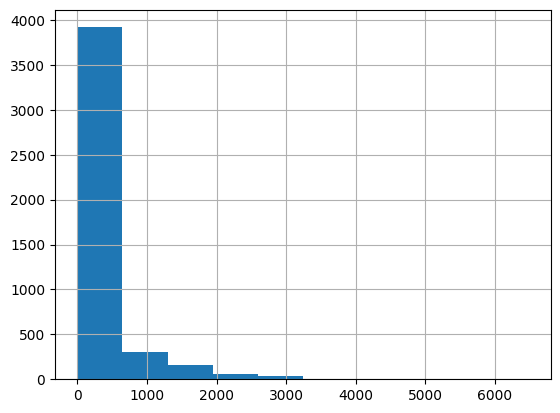

In [24]:
# Helper function to calculate late fee
def calculate_late_fee(payment_date, due_date, premium):
    # Calculate the delay in days
    delay_days = (payment_date - due_date).days
    late_fee = 0

    if delay_days > 0:
        # Late fee is applied every 15 days
        late_fee = (delay_days // 15) * (premium * 0.02)  # 2% of premium as late fee per 15 days

    return late_fee

# Function to simulate premium payments for each policy
def simulate_premium_payments(automobile_policy_df, health_policy_df):
    all_policy_payments = []
    
    # Function to handle premium payment for a specific policy
    def process_payment(policy):
        premium_paid = policy['Premium (INR)']
        payment_date = policy['Policy Start Date']
        
        # If it's a renewed policy, simulate late payment
        if policy['PolicyState'] == "Renewed":
            # Late payments (simulate some delays)
            payment_due_date = policy['Policy End Date'] - pd.DateOffset(months=12)
            days=[x for x in range(0,59)]
            weight=[0.8]+[0.8/59 for x in range(1,59)]
            payment_date = payment_due_date + pd.DateOffset(days=random.choices(days,weights=weight,k=1)[0])
            # Payment can be delayed up to 60 days
            late_fee = calculate_late_fee(payment_date, payment_due_date, premium_paid)
            premium_paid += late_fee
        else:
            # For new policies, payment is made at the time of policy purchase
            payment_date = policy['Policy Start Date']
            late_fee = 0  # No late fee for new policies
        
        all_policy_payments.append({
            'Policy ID': policy['Policy ID'],
            'Customer_id': policy['Customer_id'],
            'Payment Date': payment_date,
            'Premium Paid (INR)': round(premium_paid, 2),
            'Late Fee (INR)': round(late_fee, 2),
            'Total Payment (INR)': round(premium_paid + late_fee, 2)
        })

    # Process payments for automobile policies
    for _, policy in automobile_policy_df.iterrows():
        process_payment(policy)

    # Process payments for health policies
    for _, policy in health_policy_df.iterrows():
        process_payment(policy)

    # Return the payment records as a DataFrame
    return pd.DataFrame(all_policy_payments)

# Simulate premium payments for both automobile and health policies
premium_payment_df = simulate_premium_payments(automobile_policy_df, health_policy_df)

# Display the first few records of the premium payment simulation
premium_payment_df.tail(5)
premium_payment_df['Late Fee (INR)'].hist()


In [28]:
### Now write a program to simulate the claims seperately for automobile and health policies this should include all claim details and claim status
# Helper function to simulate more detailed automobile claims
def simulate_automobile_claims(automobile_policy_df):
    claim_data = []

    for _, policy in automobile_policy_df.iterrows():
        if random.random() < 0.3:  # 30% chance of filing a claim
            claim_id = f"CLAIM_AUTO_{fake.uuid4()}"
            claim_date = policy['Policy End Date'] - pd.DateOffset(days=random.randint(1, 30))  # Claim filed near the policy end date
            claim_amount = random.randint(50000, 1000000)
            incident_type = random.choice(['Accident', 'Theft', 'Fire', 'Natural Disaster', 'Vandalism'])
            claim_status = random.choice(['Approved', 'Rejected', 'Pending'])
            deductible_amount = random.randint(10000, 50000)
            claim_payment_date = claim_date + pd.DateOffset(days=random.randint(1, 30)) if claim_status == 'Approved' else None
            claim_payment_amount = claim_amount - deductible_amount if claim_status == 'Approved' else 0

            # Additional details
            cause_of_claim = random.choice(['Driver at fault', 'Weather conditions', 'Third-party involvement', 'Mechanical failure'])
            claim_adjuster_name = fake.name()
            repair_type = random.choice(['Repair', 'Replacement'])
            vehicle_damage_assessment = random.choice(['Minor scratches', 'Total loss', 'Major damage'])
            police_report_number = f"PR{fake.random_int(min=1000, max=9999)}"
            accident_location = fake.city()
            third_party_involvement = random.choice([True, False])
            third_party_details = fake.company() if third_party_involvement else None
            claim_type = random.choice(['Partial Loss', 'Total Loss', 'Theft', 'Fire'])
            claim_settlement_method = random.choice(['Cash Settlement', 'Repair', 'Replacement', 'Third-party Claim'])

            claim_data.append({
                'Policy ID': policy['Policy ID'],
                'Claim ID': claim_id,
                'Claim Date': claim_date,
                'Claim Amount (INR)': claim_amount,
                'Incident Type': incident_type,
                'Claim Status': claim_status,
                'Deductible Amount (INR)': deductible_amount,
                'Claim Payment Date': claim_payment_date,
                'Claim Payment Amount (INR)': claim_payment_amount,
                'Claim Cause Details': cause_of_claim,
                'Claim Adjuster Name': claim_adjuster_name,
                'Repair/Replacement Type': repair_type,
                'Vehicle Damage Assessment': vehicle_damage_assessment,
                'Police Report Number': police_report_number,
                'Accident Location': accident_location,
                'Third Party Involvement': third_party_involvement,
                'Third Party Details': third_party_details,
                'Claim Type': claim_type,
                'Claim Settlement Method': claim_settlement_method
            })

    return pd.DataFrame(claim_data)

# Simulate automobile claims for all policies
automobile_claim_df = simulate_automobile_claims(automobile_policy_df)
automobile_claim_df.head()

,Policy ID,Claim ID,Claim Date,Claim Amount (INR),Incident Type,Claim Status,Deductible Amount (INR),Claim Payment Date,Claim Payment Amount (INR),Claim Cause Details,Claim Adjuster Name,Repair/Replacement Type,Vehicle Damage Assessment,Police Report Number,Accident Location,Third Party Involvement,Third Party Details,Claim Type,Claim Settlement Method
0,AUTO_23,CLAIM_AUTO_6da9e39d-bd9d-4aa3-aaf7-e28041a06559,2029-06-11,452084,Natural Disaster,Rejected,40715,NaT,0,Driver at fault,Kabir Viswanathan,Repair,Total loss,PR2170,Bathinda,True,Dave PLC,Total Loss,Replacement
1,AUTO_35,CLAIM_AUTO_4b3926e4-126e-42aa-9682-7e3b42033d83,2027-06-25,907809,Natural Disaster,Rejected,27272,NaT,0,Weather conditions,Om Pall,Replacement,Minor scratches,PR1075,Junagadh,False,None,Partial Loss,Replacement
2,AUTO_37,CLAIM_AUTO_de2ba9c7-eb98-4433-a4c8-2109cf7fe290,2025-06-11,186886,Accident,Approved,24324,2025-07-04,162562,Driver at fault,Unnati Deshmukh,Repair,Total loss,PR9258,Vijayanagaram,True,Biswas Group,Fire,Repair
3,AUTO_43,CLAIM_AUTO_524be048-1367-4c0b-8024-f294a4b6f665,2022-10-02,191555,Vandalism,Rejected,49173,NaT,0,Mechanical failure,Tejas Saini,Repair,Major damage,PR1264,Raichur,False,None,Theft,Repair
4,AUTO_45,CLAIM_AUTO_ae475876-9b79-4437-ae53-fb7501595df8,2021-01-12,985153,Vandalism,Rejected,21203,NaT,0,Driver at fault,Rajeshri Sharma,Repair,Total loss,PR6459,Tiruvottiyur,False,None,Partial Loss,Repair


In [27]:
# Helper function to simulate more detailed health claims
def simulate_health_claims(health_policy_df):
    health_claim_data = []

    for _, policy in health_policy_df.iterrows():
        if random.random() < 0.25:  # 25% chance of filing a claim
            claim_id = f"CLAIM_HEALTH_{fake.uuid4()}"
            claim_date = policy['Policy End Date'] - pd.DateOffset(days=random.randint(1, 30))  # Claim filed near the policy end date
            treatment_duration = random.randint(1, 30)  # In days
            claim_amount = random.randint(500, 20000)*treatment_duration
            diagnosis = random.choice(['Cancer', 'Heart Disease', 'Fracture', 'Diabetes', 'Pneumonia', 'Stroke'])
            claim_status = random.choice(['Approved', 'Rejected', 'Pending'])
            hospital_name = fake.company()
            treatment_type = random.choice(['Surgery', 'Medication', 'Check-up', 'Emergency Care'])
            claim_payment_date = claim_date + pd.DateOffset(days=random.randint(1, 30)) if claim_status == 'Approved' else None
            claim_payment_amount = claim_amount if claim_status == 'Approved' else 0

            # Additional details
            pre_existing_conditions = random.choice([True, False])
            policy_type = random.choice(['Individual', 'Family Floater', 'Critical Illness', 'Group Health'])
            doctor_name = fake.name()
            doctor_specialty = random.choice(['Oncologist', 'Cardiologist', 'Orthopedic Surgeon', 'Neurologist', 'General Practitioner'])
            hospital_room_type = random.choice(['ICU', 'Private Room', 'General Ward'])
            network_hospital = random.choice([True, False])
            investigation_report = random.choice([None, 'No fraud detected', 'Fraud suspected'])
            surgical_procedure = random.choice([None, 'Heart Bypass', 'Knee Surgery', 'Cancer Surgery'])
            medical_supplies_claimed = random.choice([True, False])
            claim_reimbursement = random.choice([True, False])

            health_claim_data.append({
                'Policy ID': policy['Policy ID'],
                'Claim ID': claim_id,
                'Claim Date': claim_date,
                'Claim Amount (INR)': claim_amount,
                'Diagnosis': diagnosis,
                'Claim Status': claim_status,
                'Hospital Name': hospital_name,
                'Treatment Type': treatment_type,
                'Claim Payment Date': claim_payment_date,
                'Claim Payment Amount (INR)': claim_payment_amount,
                'Pre-existing Conditions': pre_existing_conditions,
                'Policy Type': policy_type,
                'Doctor Name': doctor_name,
                'Doctor Specialty': doctor_specialty,
                'Hospital Room Type': hospital_room_type,
                'Network Hospital': network_hospital,
                'Claim Investigation Report': investigation_report,
                'Surgical Procedure': surgical_procedure,
                'Medical Supplies Claimed': medical_supplies_claimed,
                'Treatment Duration (Days)': treatment_duration,
                'Claim Reimbursement': claim_reimbursement
            })

    return pd.DataFrame(health_claim_data)

# Simulate health claims for all policies
health_claim_df = simulate_health_claims(health_policy_df)
health_claim_df.head()

,Policy ID,Claim ID,Claim Date,Claim Amount (INR),Diagnosis,Claim Status,Hospital Name,Treatment Type,Claim Payment Date,Claim Payment Amount (INR),...,Policy Type,Doctor Name,Doctor Specialty,Hospital Room Type,Network Hospital,Claim Investigation Report,Surgical Procedure,Medical Supplies Claimed,Treatment Duration (Days),Claim Reimbursement
0,HEALTH_24,CLAIM_HEALTH_155f00d0-b8b7-464d-a507-531c4db9d349,2025-06-27,339795,Fracture,Approved,Bala-Nagy,Surgery,2025-07-01,339795,...,Individual,Mason Rattan,Oncologist,Private Room,True,Fraud suspected,Heart Bypass,False,27,False
1,HEALTH_48,CLAIM_HEALTH_2f19bd76-2997-449a-ae0e-bd507434f2ce,2025-01-27,4697,Fracture,Pending,Buch and Sons,Emergency Care,NaT,0,...,Family Floater,Aachal Shroff,Oncologist,ICU,True,None,Cancer Surgery,False,7,False
2,HEALTH_52,CLAIM_HEALTH_5d0d8846-d538-4133-9c13-595dc1fd2bfb,2024-02-27,69972,Stroke,Pending,"Shenoy, Seth and Shah",Surgery,NaT,0,...,Group Health,Chaitanya Gala,Neurologist,Private Room,True,None,Cancer Surgery,True,28,False
3,HEALTH_54,CLAIM_HEALTH_8db974f5-6912-4ebc-89a3-08241d408034,2024-01-08,98370,Fracture,Pending,"Khurana, Atwal and Badami",Medication,NaT,0,...,Individual,Mohini Ahuja,Cardiologist,General Ward,True,No fraud detected,Knee Surgery,False,15,False
4,HEALTH_56,CLAIM_HEALTH_f15d24e6-f836-4c6a-8ed2-1254f566a3d8,2024-10-10,155932,Pneumonia,Pending,Mani and Sons,Check-up,NaT,0,...,Family Floater,Kritika Randhawa,Cardiologist,General Ward,True,None,Cancer Surgery,True,28,True
